# Import Libraries and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('data_set/listings_Madrid.csv')

# Data description & Info

In [3]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.352400e+04,2.352400e+04,2.352400e+04,23521.000000,23521.000000,23524.000000,23524.000000,23524.000000,0.0,14688.000000,...,18367.000000,18367.000000,18367.000000,18364.000000,18363.000000,23524.000000,23524.000000,23524.000000,23524.000000,18505.000000
mean,3.042946e+17,2.023061e+13,1.961414e+08,27.273160,32.875686,40.421424,-3.694248,3.115287,NaN,1.665305,...,4.659335,4.754283,4.762466,4.757959,4.558934,20.709403,15.296633,5.236227,0.128209,1.773514
std,3.772467e+17,6.328260e+00,1.713861e+08,69.477173,80.800407,0.023056,0.027727,1.939038,NaN,1.001756,...,0.465963,0.410277,0.418264,0.376658,0.491897,48.643115,40.839426,28.250477,1.220447,1.877412
min,6.369000e+03,2.023061e+13,7.952000e+03,1.000000,1.000000,40.331397,-3.835330,0.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.705431e+07,2.023061e+13,3.586593e+07,1.000000,1.000000,40.409523,-3.707461,2.000000,NaN,1.000000,...,4.550000,4.700000,4.710000,4.670000,4.440000,1.000000,0.000000,0.000000,0.000000,0.360000
50%,4.842274e+07,2.023061e+13,1.398005e+08,3.000000,4.000000,40.420075,-3.701150,2.000000,NaN,1.000000,...,4.790000,4.870000,4.890000,4.880000,4.670000,2.000000,1.000000,0.000000,0.000000,1.160000
75%,7.158394e+17,2.023061e+13,3.488715e+08,15.000000,19.000000,40.431062,-3.685967,4.000000,NaN,2.000000,...,4.940000,5.000000,5.000000,4.990000,4.840000,12.000000,6.000000,1.000000,0.000000,2.600000
max,9.100071e+17,2.023061e+13,5.188792e+08,1524.000000,1647.000000,40.536230,-3.543760,16.000000,NaN,25.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,266.000000,266.000000,260.000000,18.000000,34.320000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23524 non-null  int64  
 1   listing_url                                   23524 non-null  object 
 2   scrape_id                                     23524 non-null  int64  
 3   last_scraped                                  23524 non-null  object 
 4   source                                        23524 non-null  object 
 5   name                                          23524 non-null  object 
 6   description                                   22908 non-null  object 
 7   neighborhood_overview                         12607 non-null  object 
 8   picture_url                                   23523 non-null  object 
 9   host_id                                       23524 non-null 

# Data Cleaning & Drop duplicates and handle missing values

In [5]:
df.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               5019
Length: 75, dtype: int64

In [6]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [7]:
df.reviews_per_month.isna().sum()

0

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.price.dtype

dtype('O')

In [10]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\om440\AppData\Local\Temp\ipykernel_8104\1531488561.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [11]:
df.price

0         90.0
1         31.0
2         92.0
3         29.0
4         91.0
         ...  
23519     64.0
23520    120.0
23521    132.0
23522    107.0
23523     91.0
Name: price, Length: 23524, dtype: float64

# examining the unique values

In [12]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [13]:
len(df.neighbourhood_group_cleansed.unique())

21

In [14]:
df['neighbourhood_group_cleansed'].unique()

array(['Chamartín', 'Latina', 'Centro', 'Arganzuela', 'Moncloa - Aravaca',
       'Salamanca', 'Fuencarral - El Pardo', 'Ciudad Lineal', 'Chamberí',
       'Villaverde', 'Hortaleza', 'Carabanchel', 'Tetuán', 'Retiro',
       'San Blas - Canillejas', 'Barajas', 'Usera', 'Puente de Vallecas',
       'Villa de Vallecas', 'Moratalaz', 'Vicálvaro'], dtype=object)

In [15]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

### Plot all Neighbourhood Group

C:\Users\om440\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood Group')

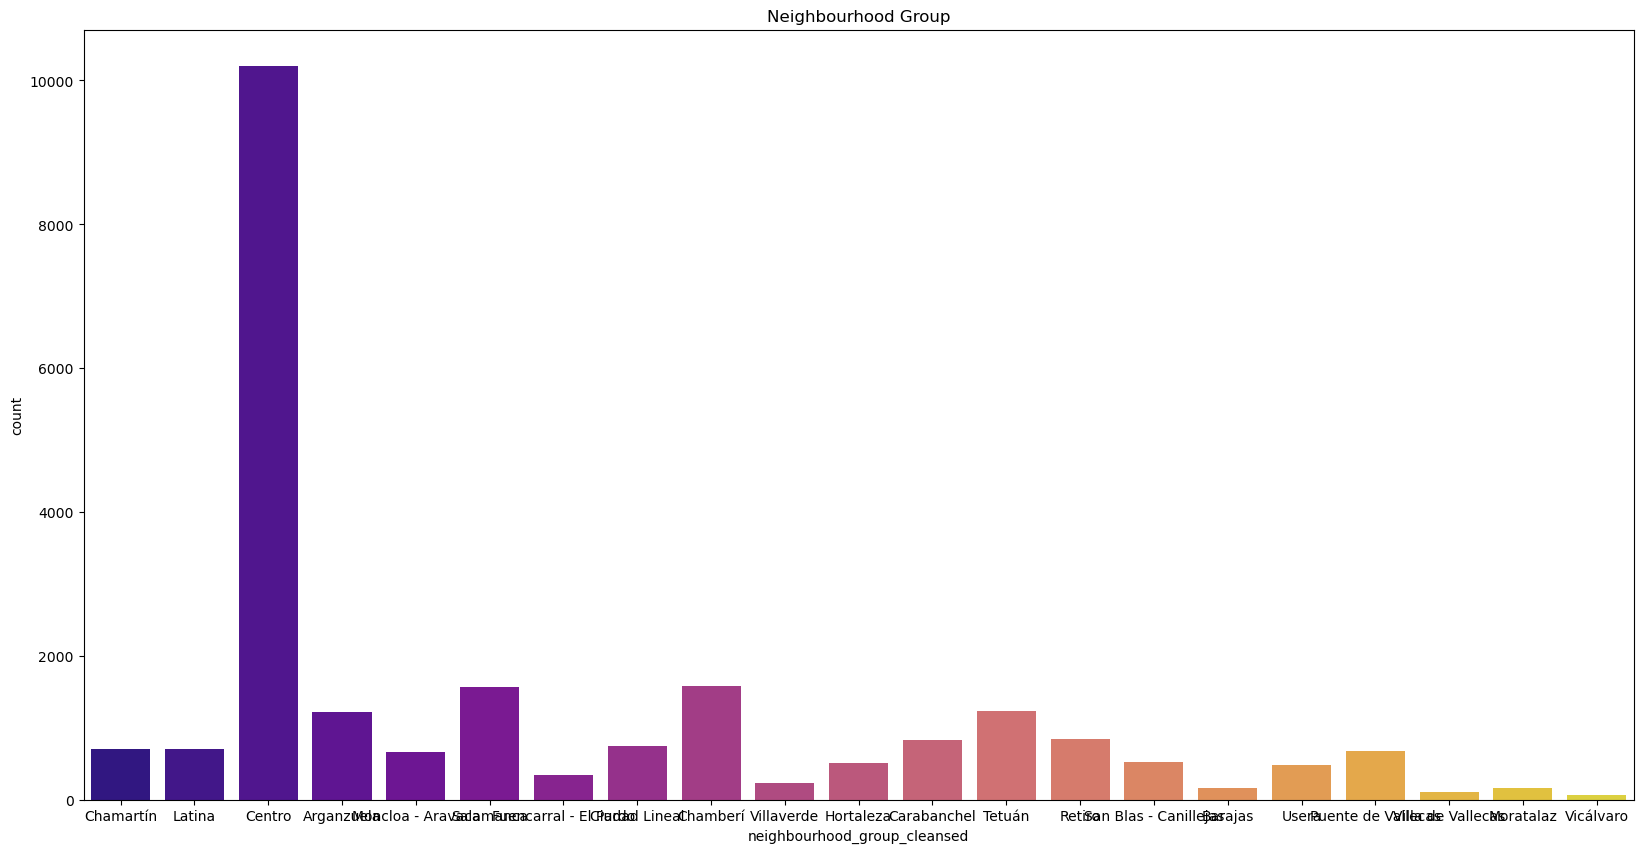

In [17]:
sns.countplot(df['neighbourhood_group_cleansed'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Neighbourhood Group')

### Plot Room Type¶


C:\Users\om440\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1000x700 with 0 Axes>

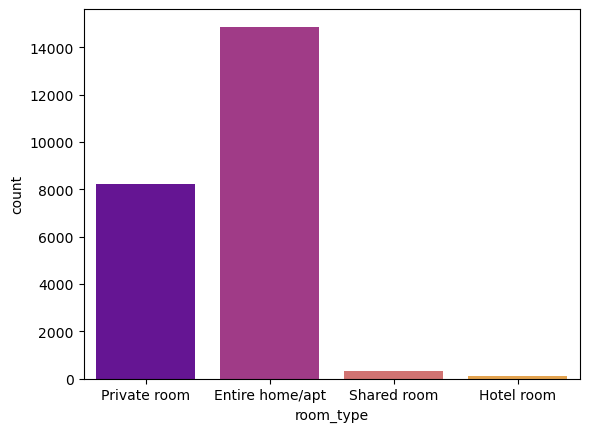

<Figure size 1000x700 with 0 Axes>

In [18]:
sns.countplot(df['room_type'], palette="plasma")
plt.figure(figsize=(10,7))

### Map of Neighbourhood group 

In [19]:
long_lat_type = df.groupby(['longitude','latitude'])['neighbourhood_group_cleansed'].max().reset_index()
long_lat_type

,longitude,latitude,neighbourhood_group_cleansed
0,-3.835330,40.473420,Moncloa - Aravaca
1,-3.832630,40.475540,Moncloa - Aravaca
2,-3.832059,40.473269,Moncloa - Aravaca
3,-3.831180,40.472750,Moncloa - Aravaca
4,-3.823730,40.470400,Moncloa - Aravaca
...,...,...,...
22514,-3.554038,40.397017,Vicálvaro
22515,-3.553841,40.397065,Vicálvaro
22516,-3.547164,40.401623,Vicálvaro
22517,-3.545904,40.400691,Vicálvaro


C:\Users\om440\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

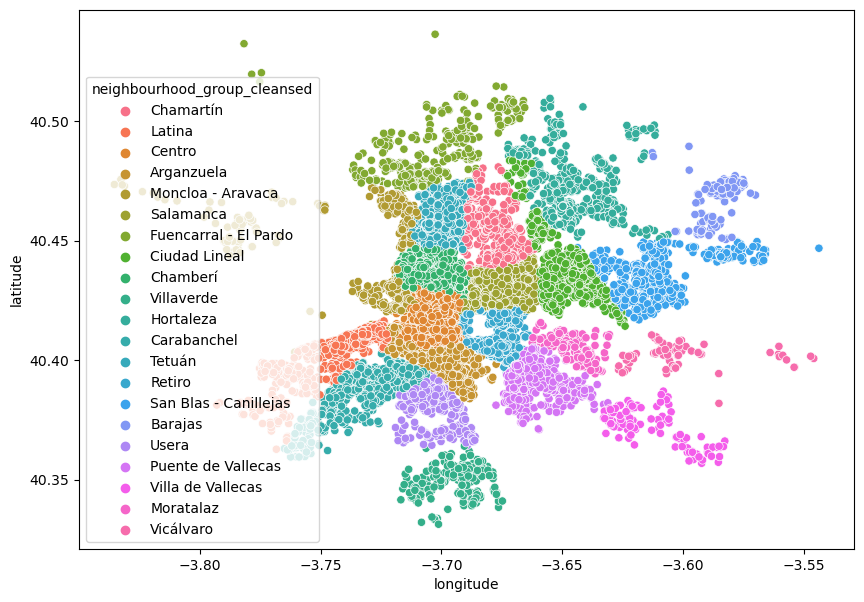

In [20]:
plt.figure(figsize=(10,7))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group_cleansed)

In [21]:
long_lat_availab = df.groupby(['longitude','latitude'])['room_type'].max().reset_index()
long_lat_availab

,longitude,latitude,room_type
0,-3.835330,40.473420,Entire home/apt
1,-3.832630,40.475540,Entire home/apt
2,-3.832059,40.473269,Shared room
3,-3.831180,40.472750,Private room
4,-3.823730,40.470400,Entire home/apt
...,...,...,...
22514,-3.554038,40.397017,Private room
22515,-3.553841,40.397065,Entire home/apt
22516,-3.547164,40.401623,Entire home/apt
22517,-3.545904,40.400691,Entire home/apt


C:\Users\om440\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

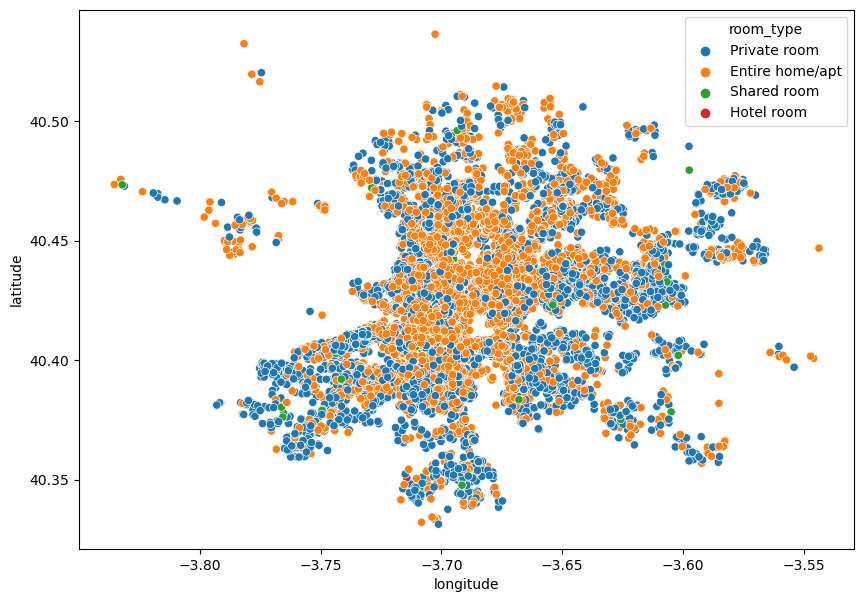

In [22]:
plt.figure(figsize=(10,7))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)

### Availability of Room

In [23]:
Availabel = df.groupby('room_type')['availability_365'].max().reset_index()
Availabel.sort_values(by='availability_365', ascending=False)

,room_type,availability_365
0,Entire home/apt,365
1,Hotel room,365
2,Private room,365
3,Shared room,365


C:\Users\om440\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


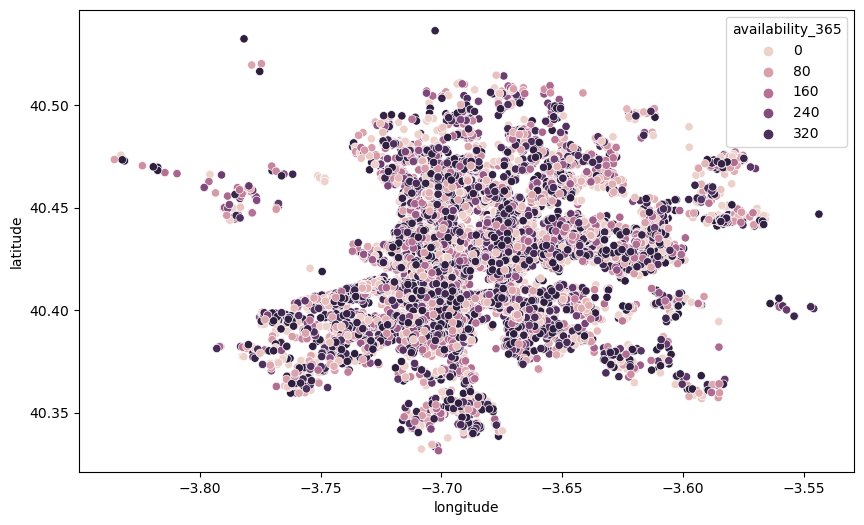

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365)
plt.show()

### host and areas

In [25]:
hosts_areas = df.groupby(['host_name','neighbourhood_group_cleansed'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(12)

,host_name,neighbourhood_group_cleansed,calculated_host_listings_count
4980,Marco,Retiro,266
4979,Marco,Moncloa - Aravaca,266
4974,Marco,Centro,266
4973,Marco,Carabanchel,266
4972,Marco,Arganzuela,266
4976,Marco,Chamberí,266
4977,Marco,Ciudad Lineal,266
4975,Marco,Chamartín,266
4981,Marco,Salamanca,266
4982,Marco,San Blas - Canillejas,266


#### we find that host Marco has listed the Top 12 highest numbers of listings

## neighbourhood group reviews

In [26]:
neighbourhood_group_reviews = df.groupby(['neighbourhood_group_cleansed'])['number_of_reviews'].max().reset_index().head(5)
neighbourhood_group_reviews.sort_values(by='number_of_reviews', ascending=False)

,neighbourhood_group_cleansed,number_of_reviews
1,Barajas,913
3,Centro,908
0,Arganzuela,738
2,Carabanchel,430
4,Chamartín,383


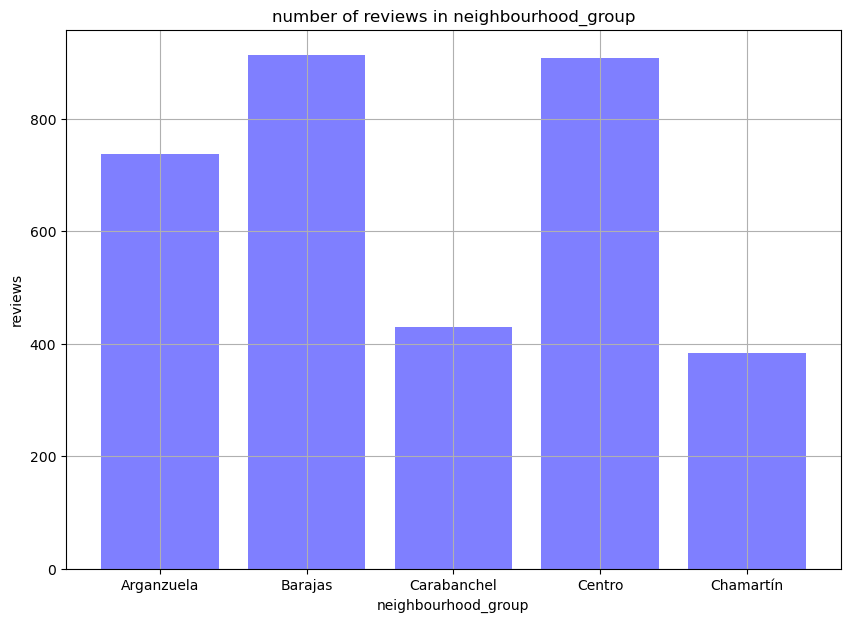

In [27]:
plt.figure(figsize=(10, 7))
plt.bar(neighbourhood_group_reviews['neighbourhood_group_cleansed'], neighbourhood_group_reviews['number_of_reviews'], color='b', alpha=0.5)
plt.title('number of reviews in neighbourhood_group')
plt.xlabel('neighbourhood_group')
plt.ylabel('reviews')
plt.grid(True)
plt.show()

### I found that Barajas & Centro have the best number of reviews

### what we find in the relation bet room type and their prices according to area?

In [28]:
room_price_area = df.groupby(['neighbourhood_group_cleansed','room_type'])['price'].max().reset_index()
room_price_area.sort_values(by='price', ascending=False).head(10)

,neighbourhood_group_cleansed,room_type,price
10,Centro,Entire home/apt,85110.0
2,Arganzuela,Private room,40714.0
43,Puente de Vallecas,Entire home/apt,21000.0
7,Carabanchel,Entire home/apt,10000.0
58,Tetuán,Entire home/apt,9999.0
18,Chamberí,Entire home/apt,9999.0
34,Latina,Private room,9000.0
47,Retiro,Entire home/apt,8930.0
0,Arganzuela,Entire home/apt,8469.0
51,Salamanca,Entire home/apt,7777.0


### we find that the Entire home & Private room are the most expensive especially in " Centro,  Arganzuela"

## which hosts are the busiest?

In [29]:
busy_hosts = df.groupby(['host_id', 'host_name', 'room_type', 'price'])['number_of_reviews'].max().reset_index()
busy_hosts = busy_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busy_hosts

,host_id,host_name,room_type,price,number_of_reviews
9430,112661737,Elsa,Private room,47.0,913
2081,8321213,Paula,Entire home/apt,124.0,908
11061,161798391,El Tesoro,Entire home/apt,110.0,840
2030,8130428,Carmelo,Entire home/apt,98.0,818
2234,9324929,Isra,Entire home/apt,106.0,802
109,499977,Charo,Private room,31.0,785
5791,40957790,Alejandra,Private room,19.0,756
16749,414244011,The Central House Madrid,Shared room,38.0,755
4796,31083349,Raquel,Entire home/apt,94.0,747
2076,8321213,Paula,Entire home/apt,109.0,746


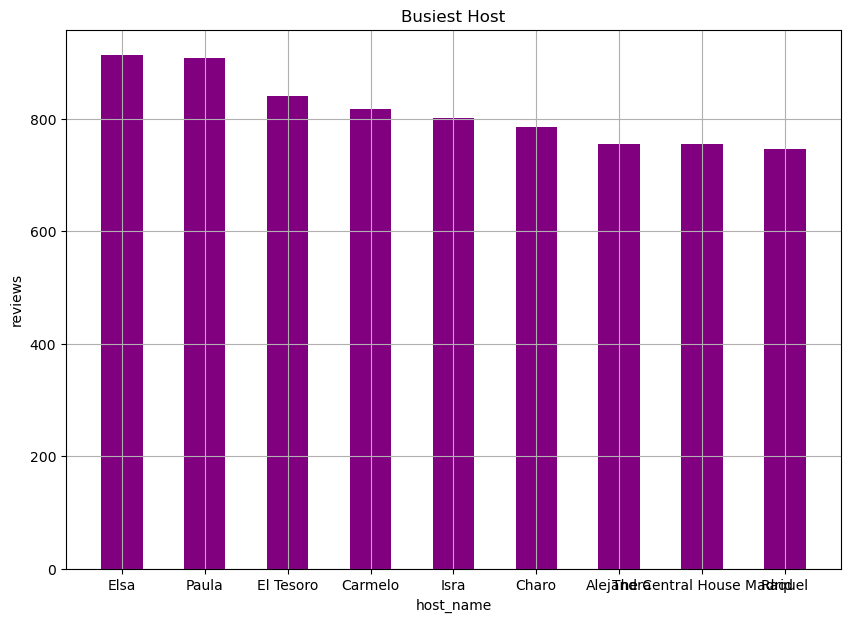

In [30]:
fig = plt.figure(figsize=(10,7))
plt.bar(busy_hosts['host_name'],busy_hosts['number_of_reviews'], color='purple', width=0.5)
plt.xlabel('host_name')
plt.ylabel('reviews')
plt.title('Busiest Host')
plt.grid(True)
plt.show()

### we have the busiest hosts
1. Elsa
2. Paula
3. El Tesoro
#### because these hosts listed thesir room type as entire home and private room which is preferred by most number of prople also their reviews are higher.   

## which hosts are charging higher price?

In [31]:
busy_hosts = df.groupby(['host_id', 'host_name', 'room_type','neighbourhood_group_cleansed'])['price'].max().reset_index()
busy_hosts = busy_hosts.sort_values(by='price', ascending=False).head(10)
busy_hosts

,host_id,host_name,room_type,neighbourhood_group_cleansed,price
1412,8933508,Pablo,Entire home/apt,Centro,85110.0
6076,99328304,David,Entire home/apt,Centro,75180.0
1503,9872400,Marta,Entire home/apt,Centro,72140.0
4808,60469442,Gorka,Private room,Arganzuela,40714.0
10792,362191258,Juanita - BELVILLA,Entire home/apt,Puente de Vallecas,21000.0
11940,453730524,Almar,Entire home/apt,Centro,10170.0
12939,497798124,Boyang,Entire home/apt,Carabanchel,10000.0
718,4062786,Equipo DFLAT Madrid,Entire home/apt,Chamberí,9999.0
11107,400123061,Maeva,Entire home/apt,Tetuán,9999.0
1120,6637077,Jesus,Private room,Latina,9000.0


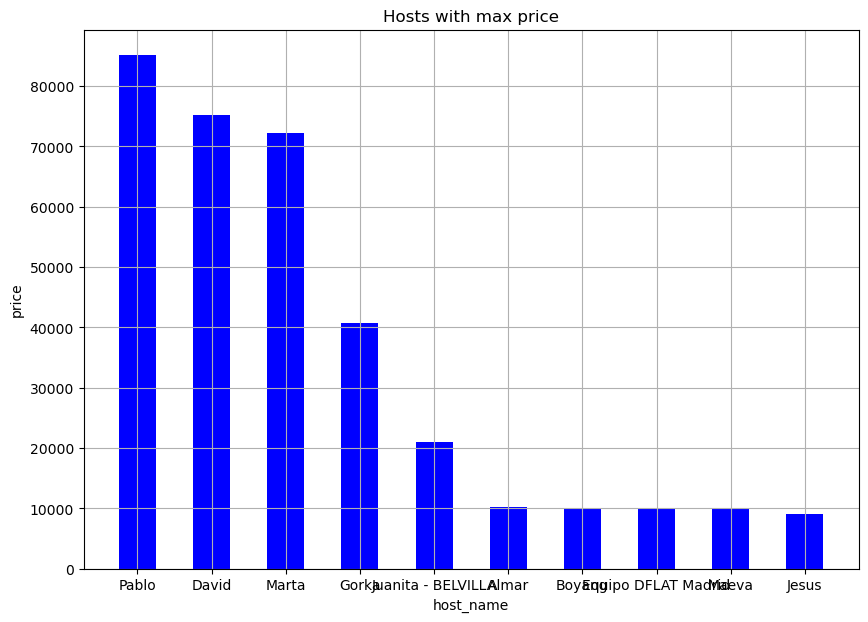

In [32]:
fig = plt.figure(figsize=(10,7))
plt.bar(busy_hosts['host_name'],busy_hosts['price'], color='blue', width=0.5)
plt.xlabel('host_name')
plt.ylabel('price')
plt.title('Hosts with max price')
plt.grid(True)
plt.show()

### As we can see that the heighest price is in (Pablo, David, Marta)

## traffic difference among differnt areas

In [33]:
traffic = df.groupby(['neighbourhood_group_cleansed', 'room_type'])['minimum_nights'].count().reset_index()
traffic = traffic.sort_values(by='minimum_nights', ascending=False).head(15)
traffic

,neighbourhood_group_cleansed,room_type,minimum_nights
10,Centro,Entire home/apt,7497
12,Centro,Private room,2425
51,Salamanca,Entire home/apt,1208
18,Chamberí,Entire home/apt,960
58,Tetuán,Entire home/apt,784
0,Arganzuela,Entire home/apt,743
20,Chamberí,Private room,597
47,Retiro,Entire home/apt,532
2,Arganzuela,Private room,469
14,Chamartín,Entire home/apt,463


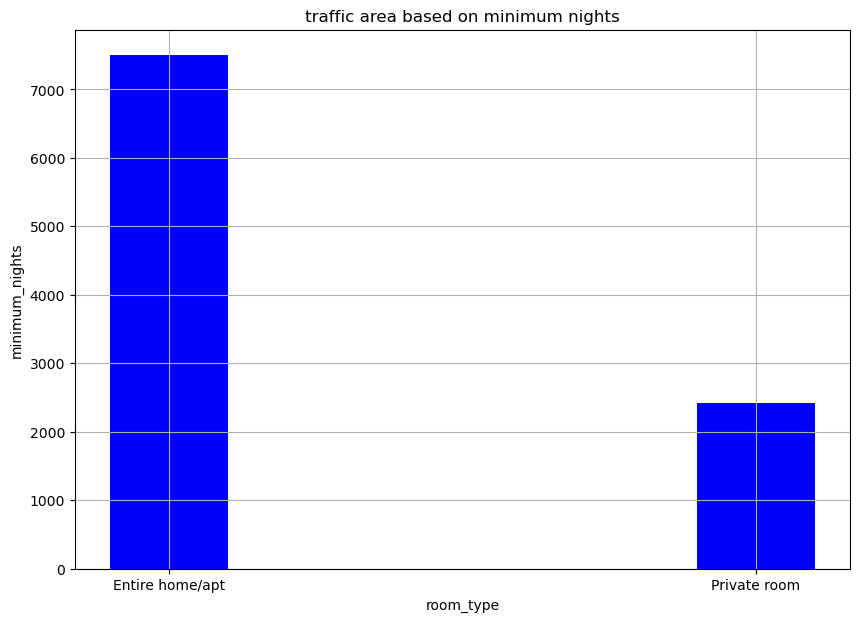

In [34]:
fig = plt.figure(figsize=(10,7))
plt.bar(traffic['room_type'],traffic['minimum_nights'], color='blue', width=0.2)
plt.xlabel('room_type')
plt.ylabel('minimum_nights')
plt.title('traffic area based on minimum nights')
plt.grid(True)
plt.show()

### from the visualiation we found that most of the people likely to stay at Entire home and private room

### get the correlation

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

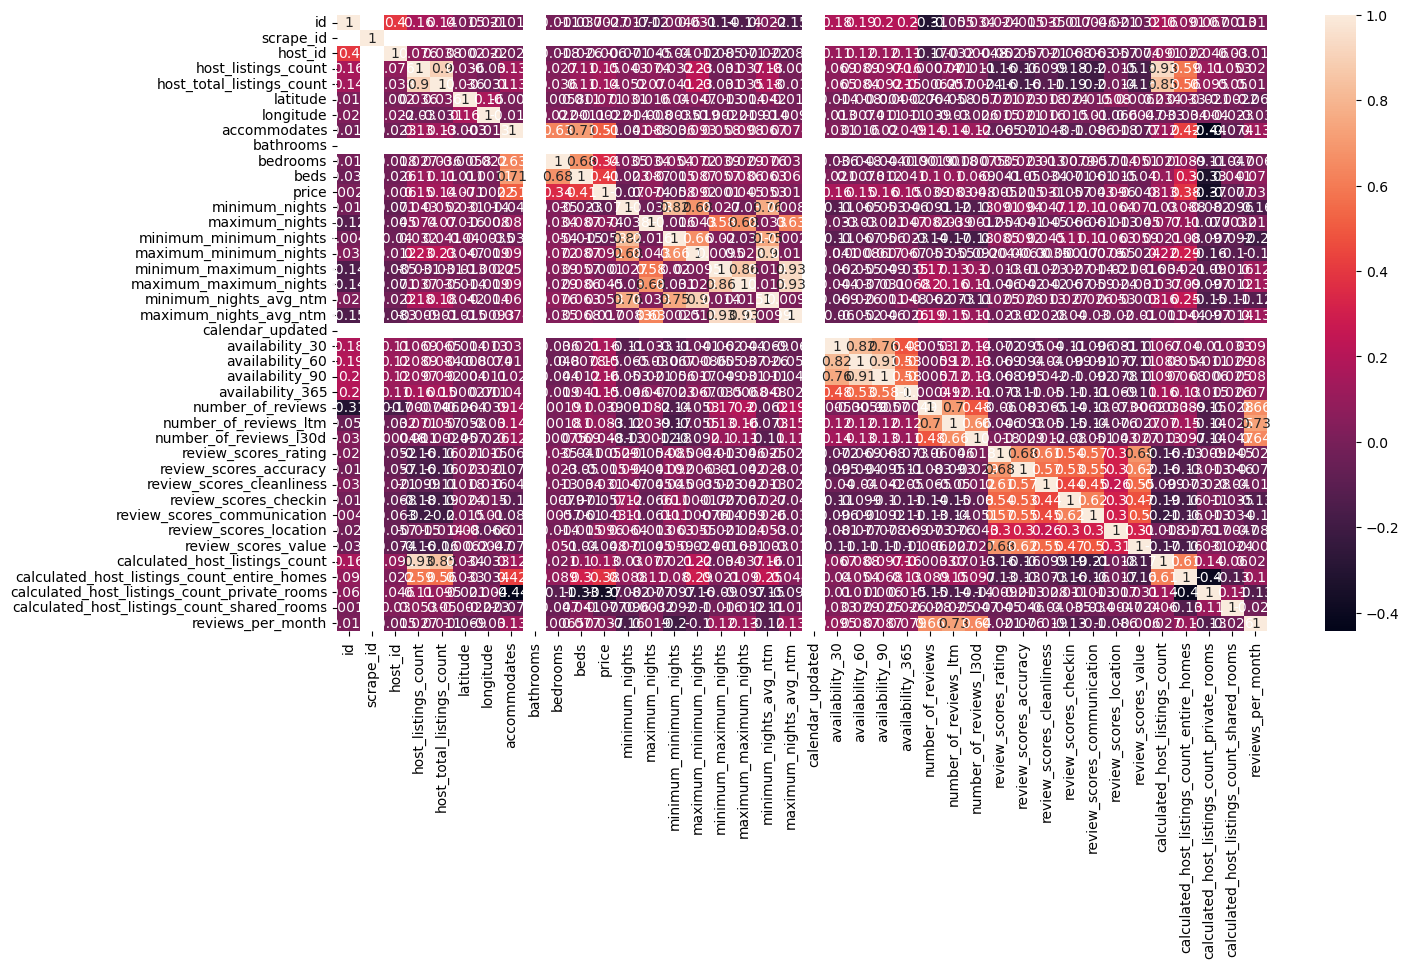

In [35]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns

# conclusion:
1. I found that host Marco has listed the Top 12 highest numbers of listings.
2. I found that Barajas & Centro have the best number of reviews.
3. i found that the Entire home/apt is the highest number of room types and
    prices are high in Pablo, David, Marta.
4. people like to stay in less proce and their revews are higher
5. I found the busiest hosts Elsa, Paula, El-Tesoro
    because these hosts listed thesir room type as entire home and private
    room which is preferred by most number of prople also their reviews are
    higher.
6. we have seen that 10 hosts who are charging maximum price: (Pablo, David,
   Marta, Gorka, Juanita - BELVILLA, Almar, Boyang, Maeva, Jesus)
   max price is : 85110.0$
   